In [2]:
from glob import glob
import sys
import matplotlib.pylab as plt
import nibabel as nib
import numpy as np
# np.set_printoptions(threshold=sys.maxsize)

# Data is required at dataset folder to enable the view  data
### train_images is also known input data
### segmentation_images is also known as output (or prediction)

In [3]:
train_images = sorted(glob("./dataset/case_00???/imaging.nii"))
segmentation_images = sorted(glob("./dataset/case_00???/segmentation.nii"))

In [4]:
print(train_images)
print(segmentation_images)

['./dataset/case_00000/imaging.nii', './dataset/case_00001/imaging.nii', './dataset/case_00002/imaging.nii']
['./dataset/case_00000/segmentation.nii', './dataset/case_00001/segmentation.nii', './dataset/case_00002/segmentation.nii']


## Get the shape of the images to understand how the 3D images are stored
-It is found that(layers, pixels, pixels):
- For case 0: (611, 512, 512) 
- For case 2: (261, 512, 512) 
#### 3D cases have different layers !!

In [29]:
case_index = 0
img_path = train_images[case_index]
img = nib.load(img_path).get_fdata()
print("case={}, shape of image = {} with type {}".format(case_index, img.shape, type(img)))

case=0, shape of image = (611, 512, 512) with type <class 'numpy.memmap'>


In [30]:
case_index_2 = 1
seg_img_path2 = segmentation_images[case_index_2]
seg_img2 = nib.load(seg_img_path2).get_fdata()
print("case={}, shape of image = {} with type {}".format(case_index_2, seg_img2.shape, type(seg_img2)))
case_index_2 = 2
seg_img_path2 = segmentation_images[case_index_2]
seg_img2 = nib.load(seg_img_path2).get_fdata()
print("case={}, shape of image = {} with type {}".format(case_index_2, seg_img2.shape, type(seg_img2)))

case=1, shape of image = (602, 512, 512) with type <class 'numpy.memmap'>
case=2, shape of image = (261, 512, 512) with type <class 'numpy.memmap'>


# Plot the case 0

In [7]:
square_num = 6
factor = img.shape[0] // (square_num**2)
print("number of layers to be shown = {}".format(square_num**2))

number of layers to be shown = 36


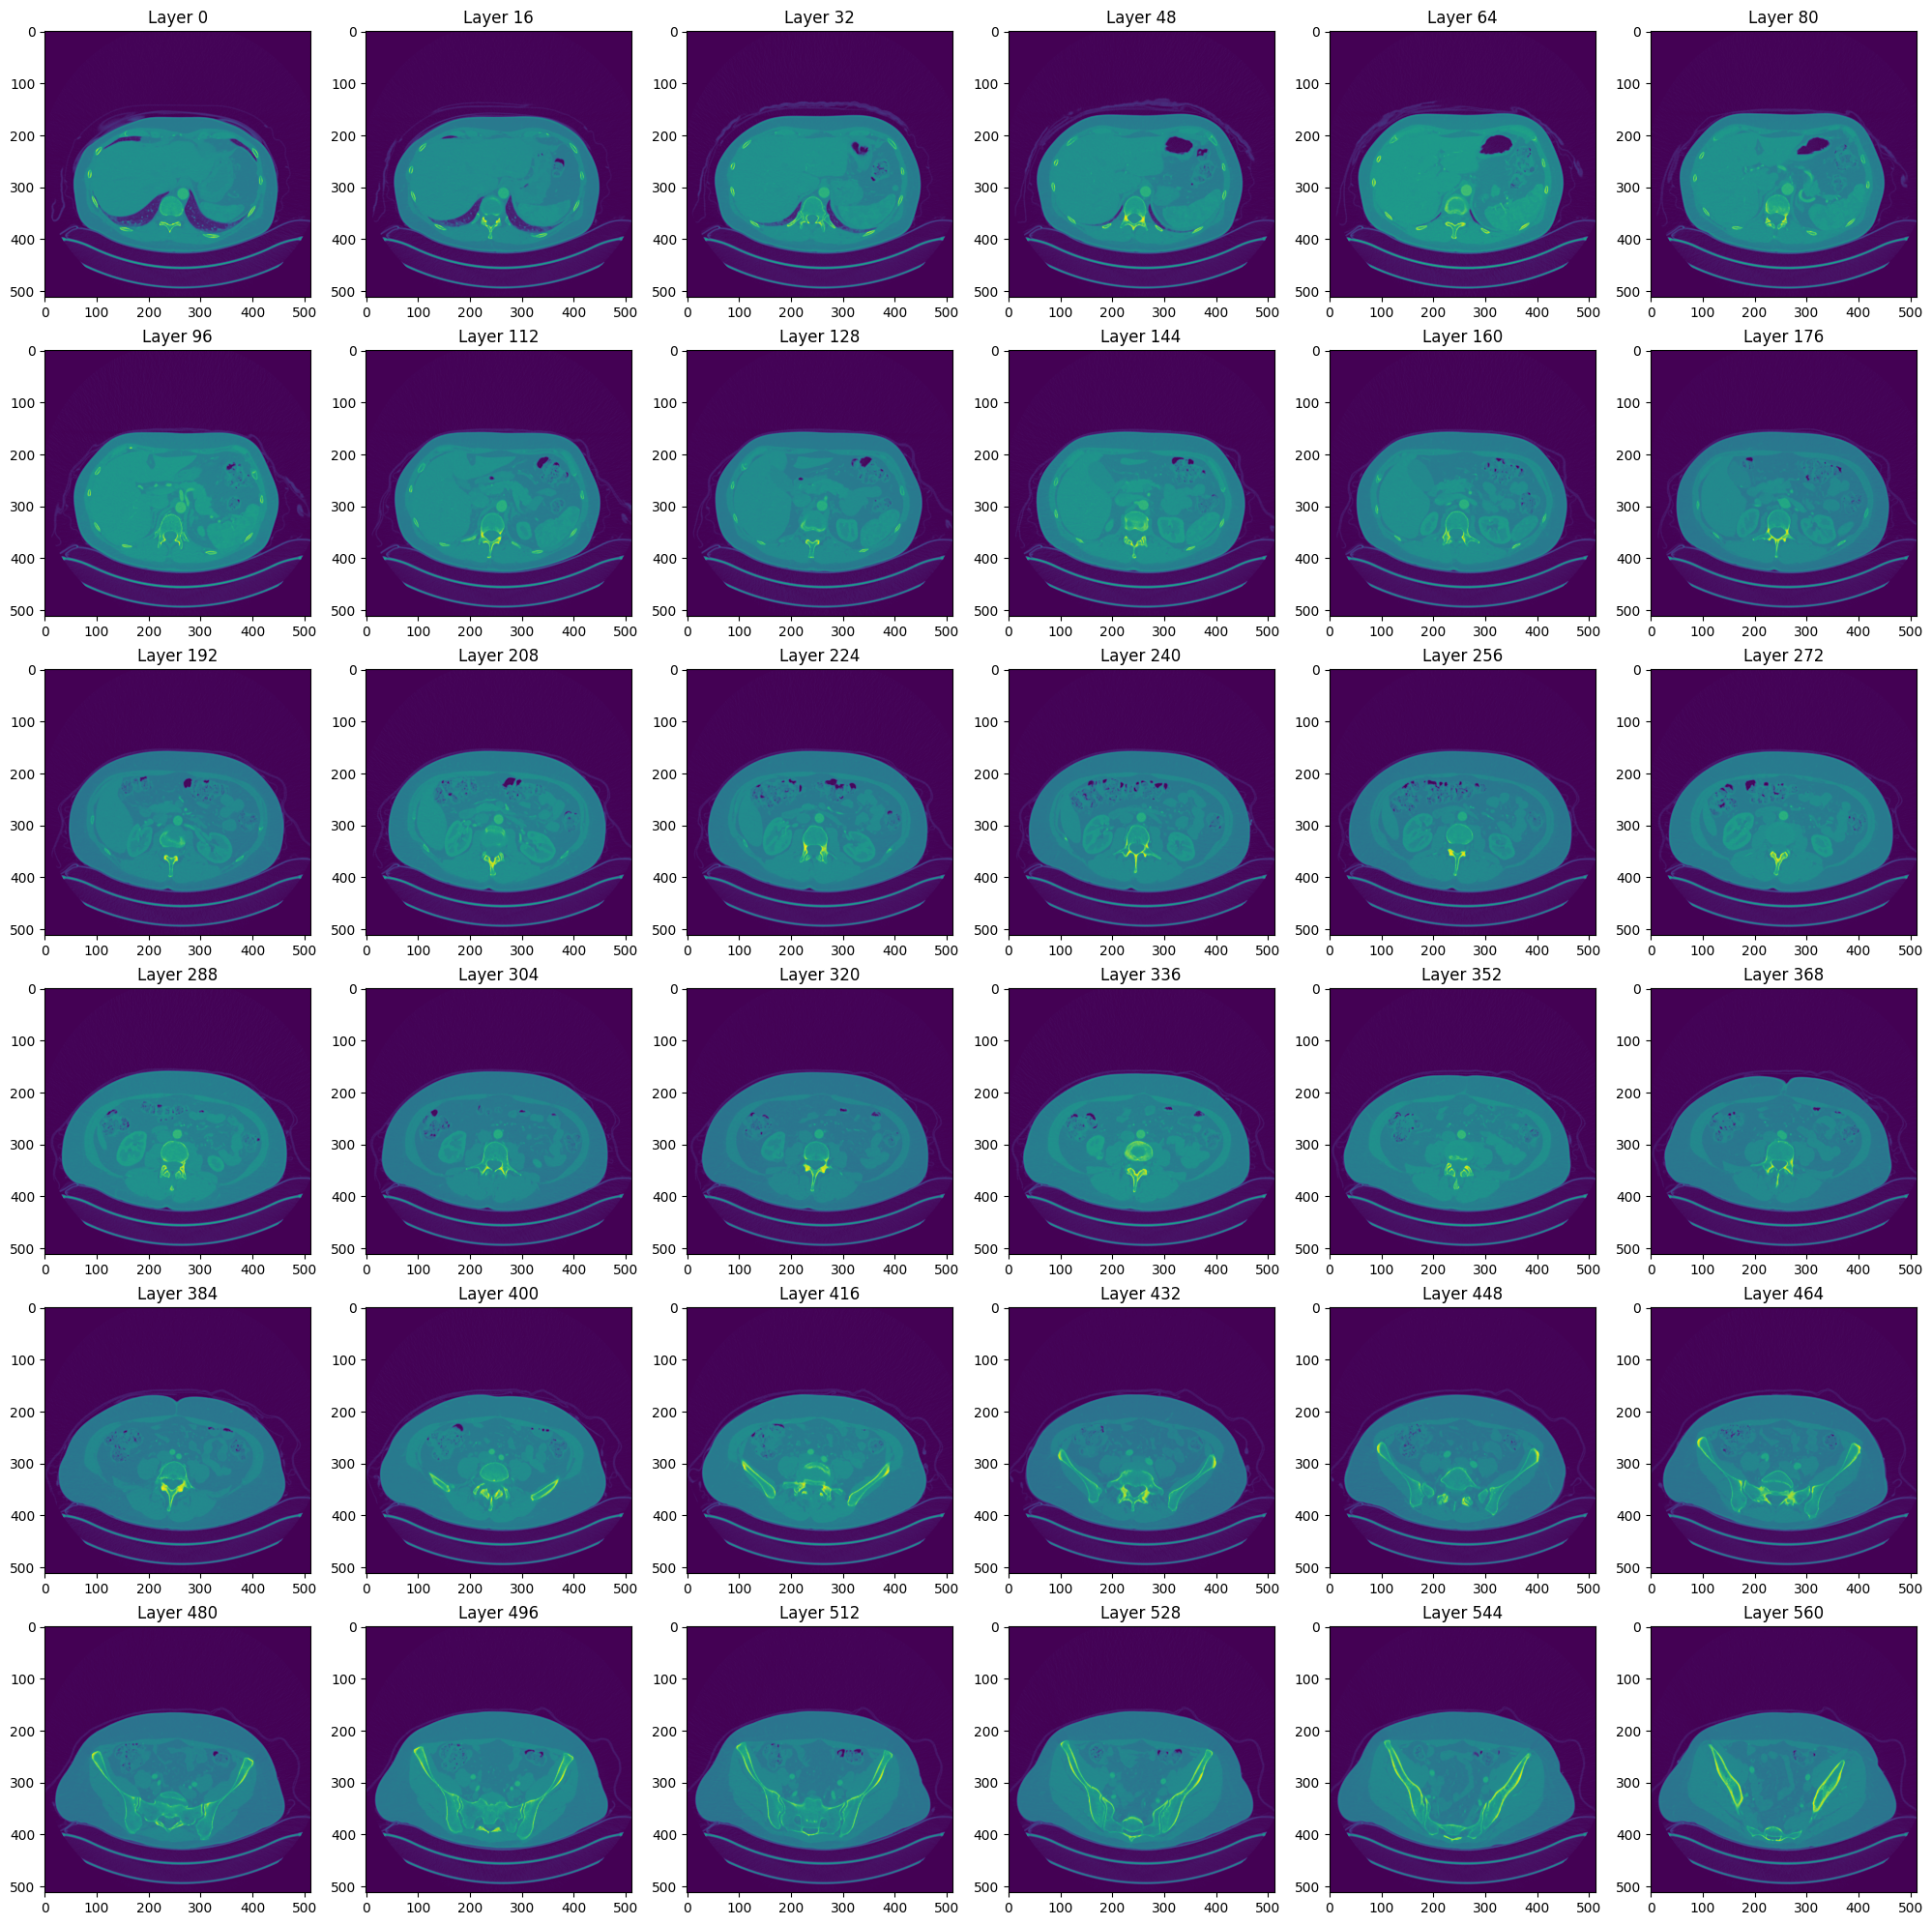

In [8]:
plt.style.use('default')
fig, axes = plt.subplots(square_num,square_num, figsize=(25,25))
for i, ax in enumerate(axes.reshape(-1)):
    ax.title.set_text(f'Layer {i*factor}')
    ax.imshow(img[i*factor,:,:])
plt.show()

## Check layers at output to ensure that it manages to capture all classes
- It is likely to be miss some if number of layers used in single case is reduced
- Before that, confirm segmentation image layers

In [9]:
seg_img_path= segmentation_images[case_index]
seg_img = nib.load(seg_img_path).get_fdata()
print("shape of image = {} with type {}".format(seg_img.shape, type(seg_img)))

shape of image = (611, 512, 512) with type <class 'numpy.memmap'>


# Determine Classes in Segmentation Layers
- From context, it is known to be segmented to 3 classes, which are Kidney, Cyst and Tumor
- Kidney = 1
- Tumor = 2
- Cyst = 3

In [10]:
print("Case={} , class labels = {} ".format(case_index, np.unique(seg_img)))

Case=0 , class labels = [0. 1. 2.] 


## Lets show kidney label
- Case 0 has no Cyst label

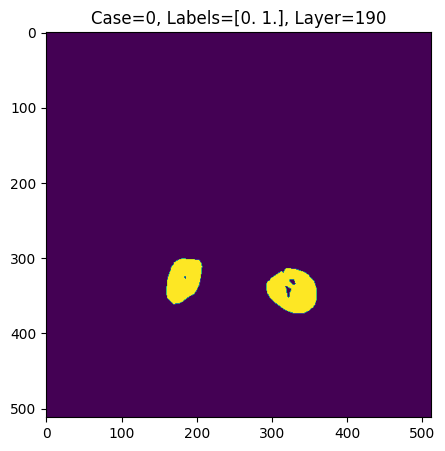

In [11]:
this_layer = 190
plt.style.use('default')
fig, axes = plt.subplots(figsize=(5,5))
axes.imshow(seg_img[this_layer,:,:])
axes.set_title(f"Case={case_index}, Labels={np.unique(seg_img[190,:,:])}, Layer={this_layer}")
plt.show()

In [25]:
print("Case={} , class labels = {} ".format(case_index_2, np.unique(seg_img2)))

Case=2 , class labels = [0. 1. 2. 3.] 


# Case 0 has 2 labels, thus, plot should capture 2 colors at segmentation image

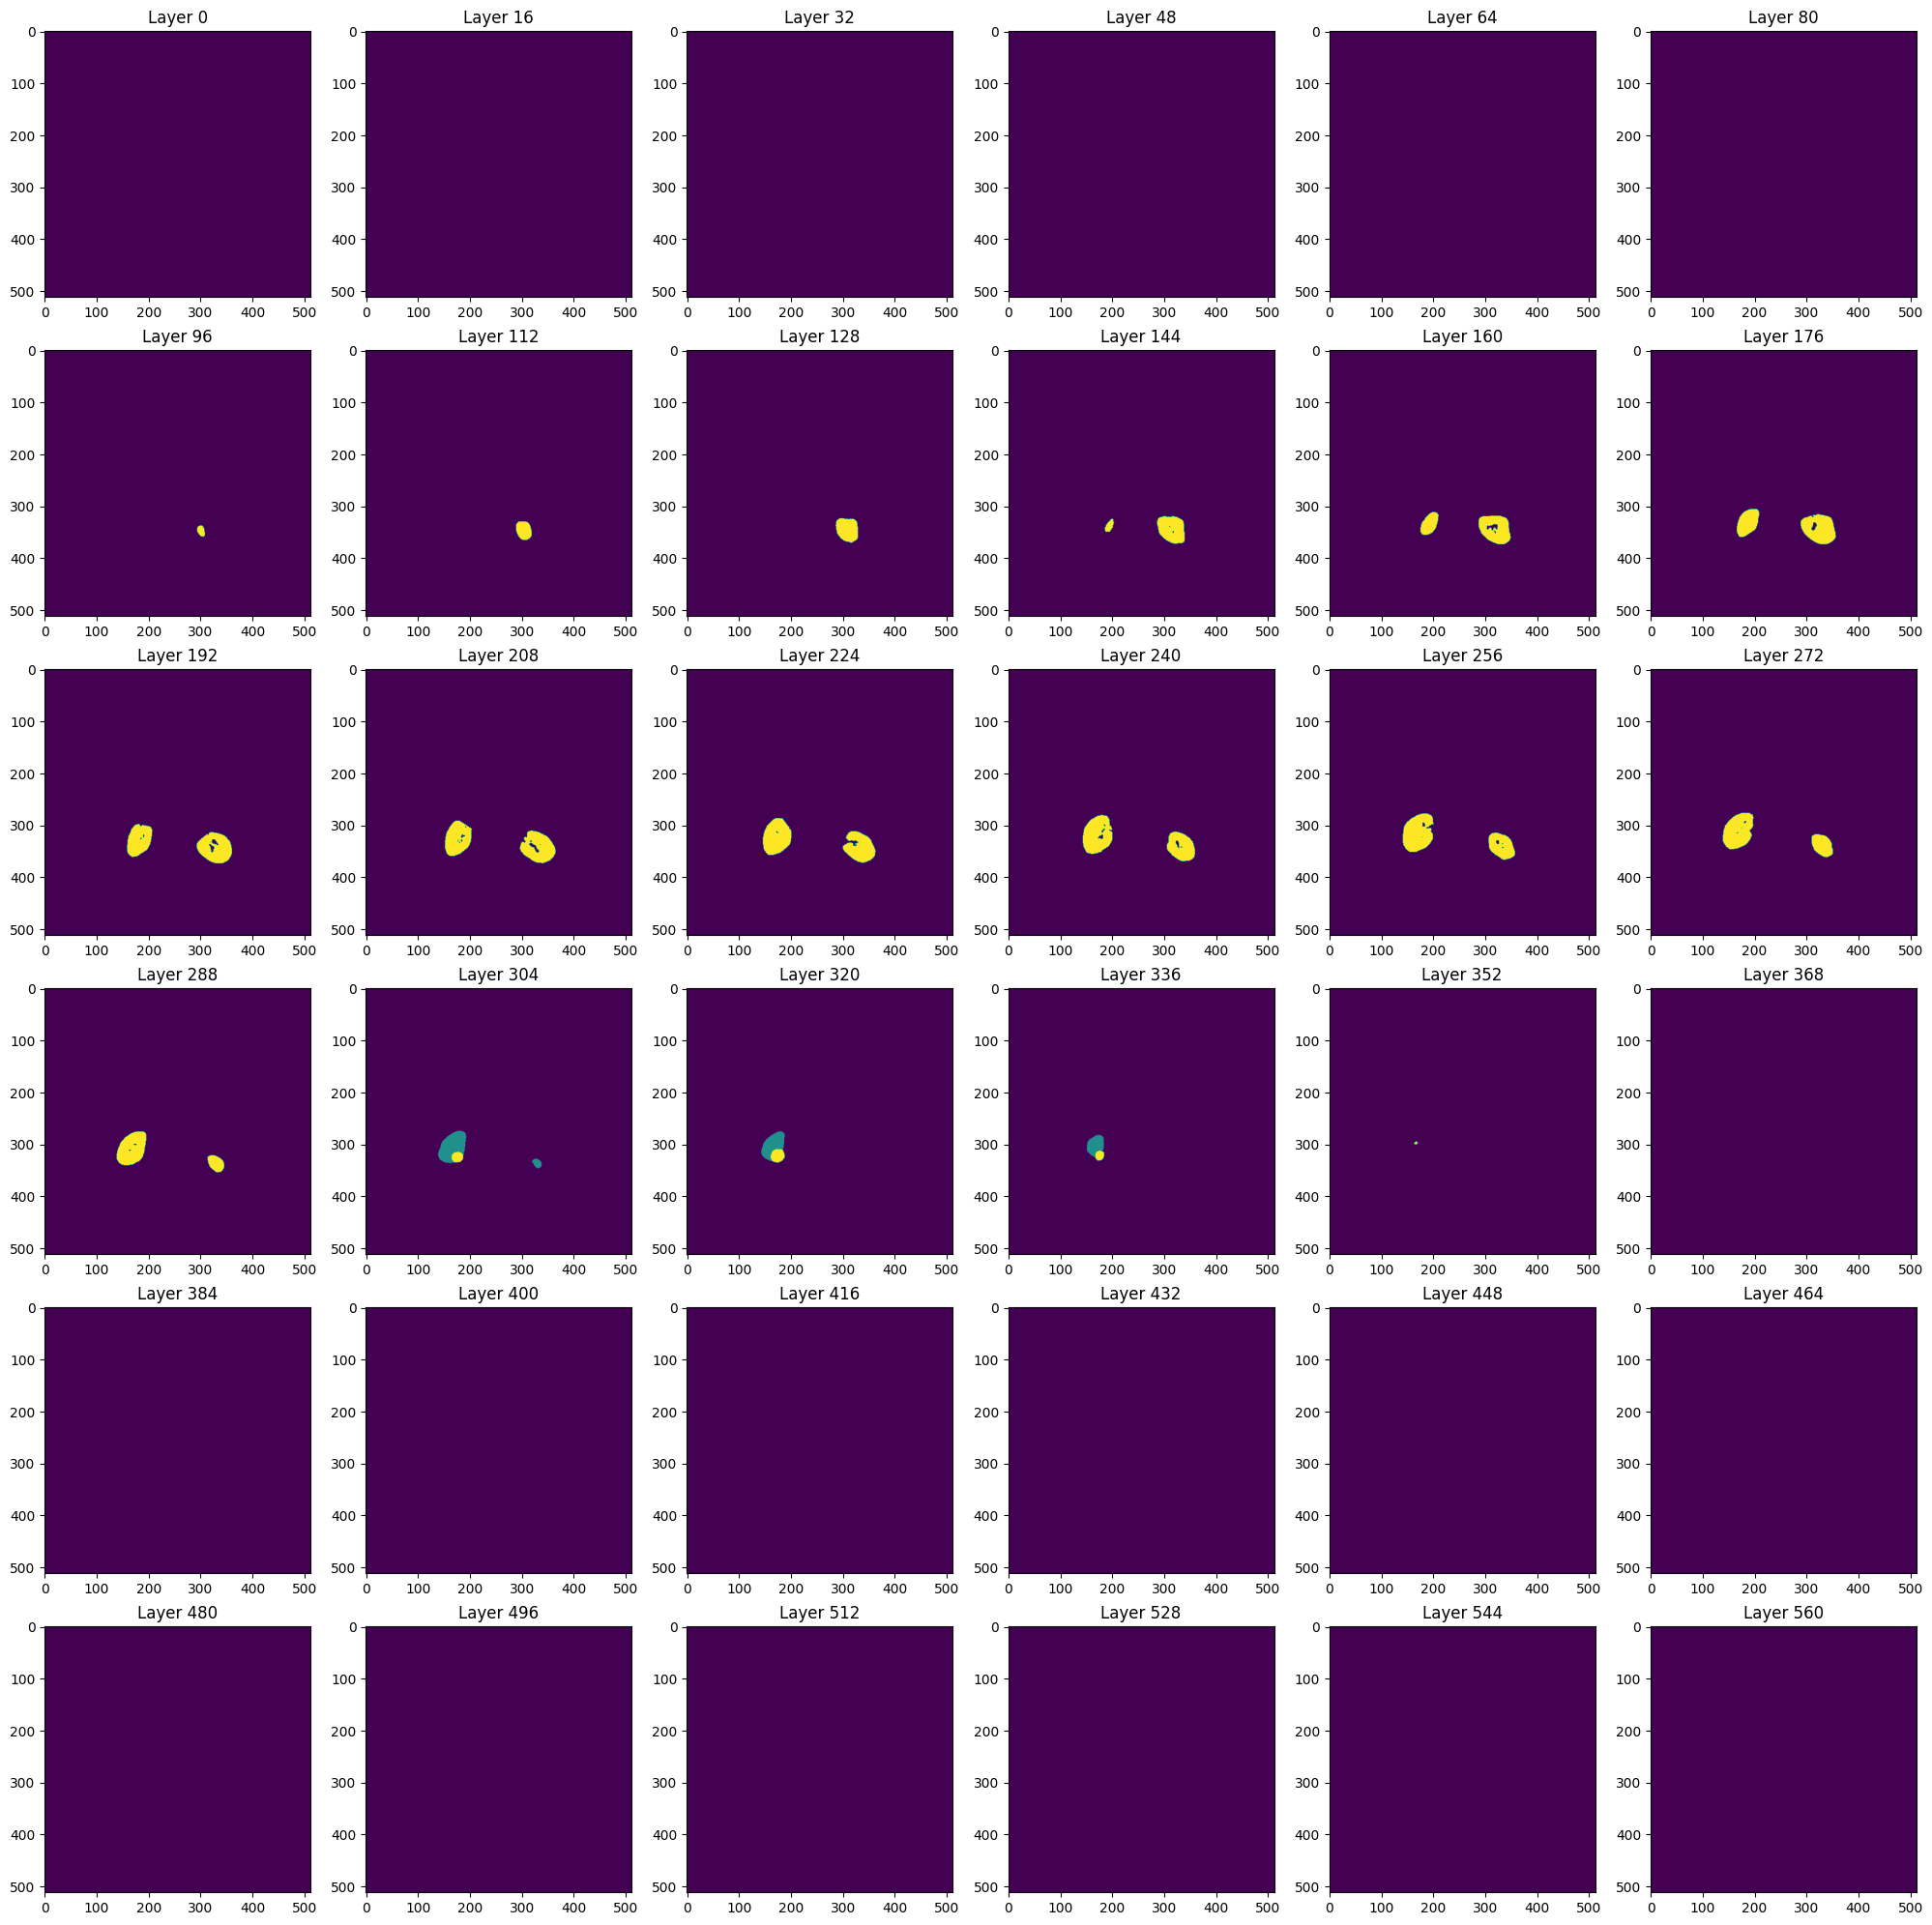

In [26]:
plt.style.use('default')
fig, axes = plt.subplots(square_num,square_num, figsize=(25,25))
for i, ax in enumerate(axes.reshape(-1)):
    ax.title.set_text(f'Layer {i*factor}')
    ax.imshow(seg_img[i*factor,:,:])
plt.show()